# Taller 3

----------


#### Integrantes:
- Cristobal Yob
- Belisario Maldonado 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import missingno as msno
from IPython.display import display, HTML


In [2]:
df = pd.read_csv('diabetesTaller.csv',sep=';')

## 1- Analisis Preliminar
-----

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


### 1.2 Revision de datos duplicados

In [4]:
print(f"La cantidad de duplicados es {df.duplicated().sum()} por ende no es necesario eliminarl registros")

La cantidad de duplicados es 0 por ende no es necesario eliminarl registros


### 1.3 Revision preliminar de datos faltantes

In [5]:
# Calcular los valores faltantes
missing_data = df.isna().sum().to_frame(name='Valores Faltantes')
missing_data['%Valores Faltantes'] = (missing_data['Valores Faltantes'] / len(df) * 100).round(2)

# Tabla mas visual
html_table = missing_data.to_html()
print("Tabla de valores faltantes y sus porcentajes")
display(HTML(html_table))


Tabla de valores faltantes y sus porcentajes


,Valores Faltantes,%Valores Faltantes
Pregnancies,0,0.00
Glucose,14,1.82
BloodPressure,3,0.39
SkinThickness,2,0.26
Insulin,11,1.43
BMI,4,0.52
DiabetesPedigreeFunction,5,0.65
Age,7,0.91
Outcome,0,0.00


se confirma que existen datos faltantes pero porcentualmente son pocos significativos por ende se pueden imputar sin grandes riesgos de dañar las distribuciones pero se va a proceder a estudiar aun mas las variables antes de imputar

### 1.4 Revision de Variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   754 non-null    float64
 2   BloodPressure             765 non-null    float64
 3   SkinThickness             766 non-null    float64
 4   Insulin                   757 non-null    float64
 5   BMI                       764 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       761 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


Para efectos de imputar los faltantes se confirma que las variables son tipo numerico por ende no es necesario codificar variables categoricas (se entiende que outcome es una variable que solo puede ser 1 y 0 pero funciona en terminos practicos tratarla como int)

### 1.5 Distribuciones de las variables

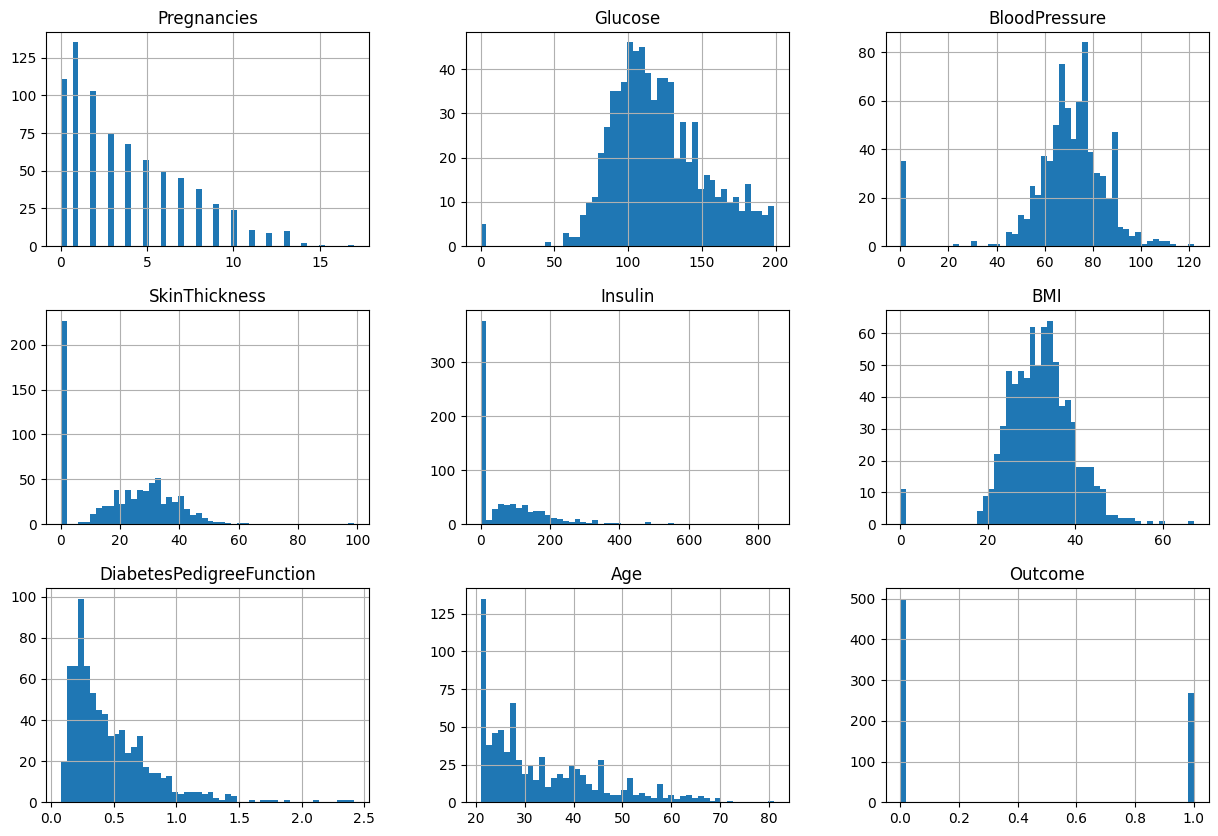

In [7]:
df.hist(figsize=(15, 10), bins=50)
plt.show()

Se verifica que la base de datos tiene variables con valores "0". Estos valores "0" significan que dichos valores no fueron medidos. Por ello, estos "0" serán considerados datos faltantes.

Las variables son:

- Glucose
- Blood preasure
- Skin thickness 
- Insulin 
- BMI  

## 2- Analisis de valores faltantes y outliers
----

#### Remplazo de Valores 0 por valores faltantes

In [8]:
# Reemplazar los valores 0 por NaN en las columnas especificadas
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    df[column] = pd.to_numeric(df[column], errors='coerce').replace(0, float('nan'))


#### Tabla de Valores Faltantes Actualizada

In [9]:
from IPython.display import display, HTML

# Calculate the percentage of missing values
missing_data = df.isna().sum().to_frame(name='Valores Faltantes')
missing_data['%Valores Faltantes'] = (missing_data['Valores Faltantes'] / len(df) * 100).round(2)

# Convert to HTML and display
html_table = missing_data.to_html()
print("Tabla de valores faltantes Nuevos")
display(HTML(html_table))

Tabla de valores faltantes Nuevos


,Valores Faltantes,%Valores Faltantes
Pregnancies,0,0.00
Glucose,19,2.47
BloodPressure,38,4.95
SkinThickness,229,29.82
Insulin,385,50.13
BMI,15,1.95
DiabetesPedigreeFunction,5,0.65
Age,7,0.91
Outcome,0,0.00


Los datos faltantes en SkinThickness e Insulin aumentan significativamente, pero se imputarán utilizando una metodología robusta en lugar de eliminar estas dos variables, o utilizar estas variables con tantos valores nulos Además, se rverificaráque sus distribuciones  o vse mantengan similares 

#### Distribuciones actualizada

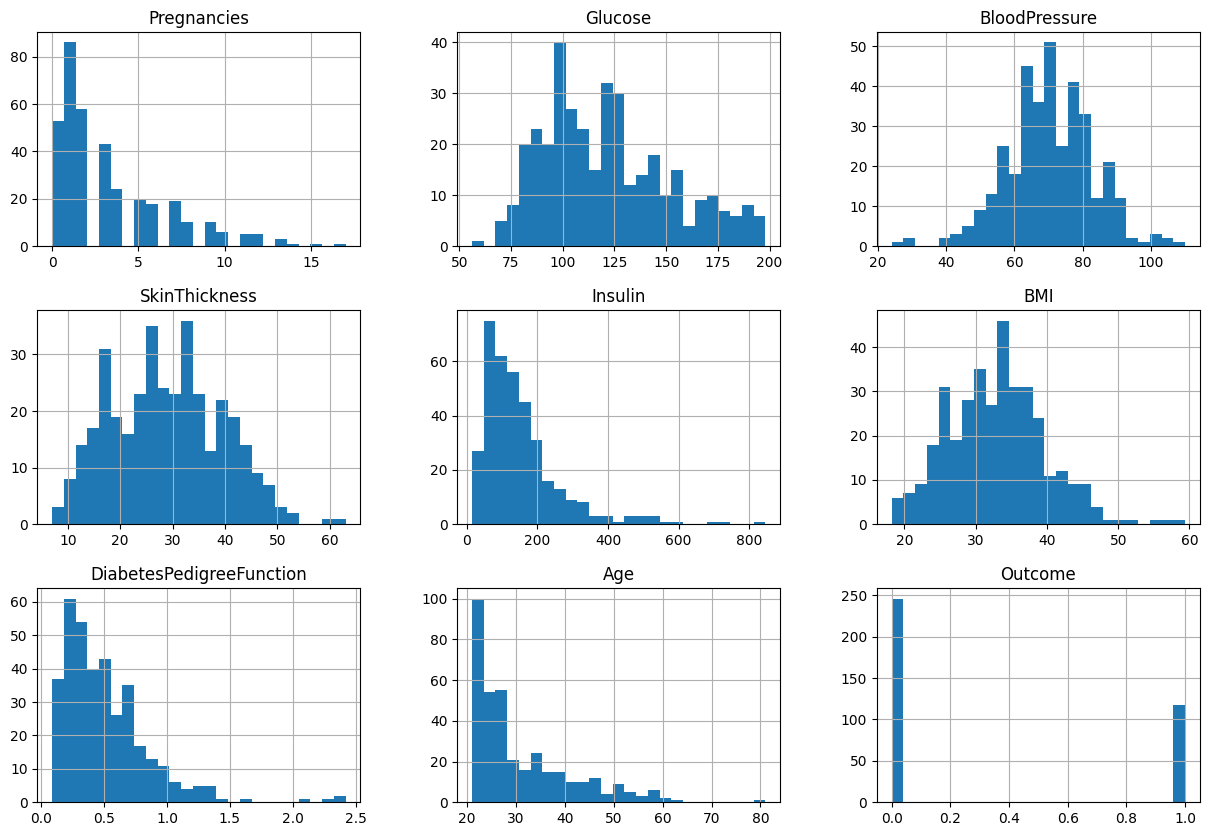

In [10]:
df.dropna().hist(figsize=(15, 10), bins=25)
plt.show()

### 2.1 Analisis de Outliers

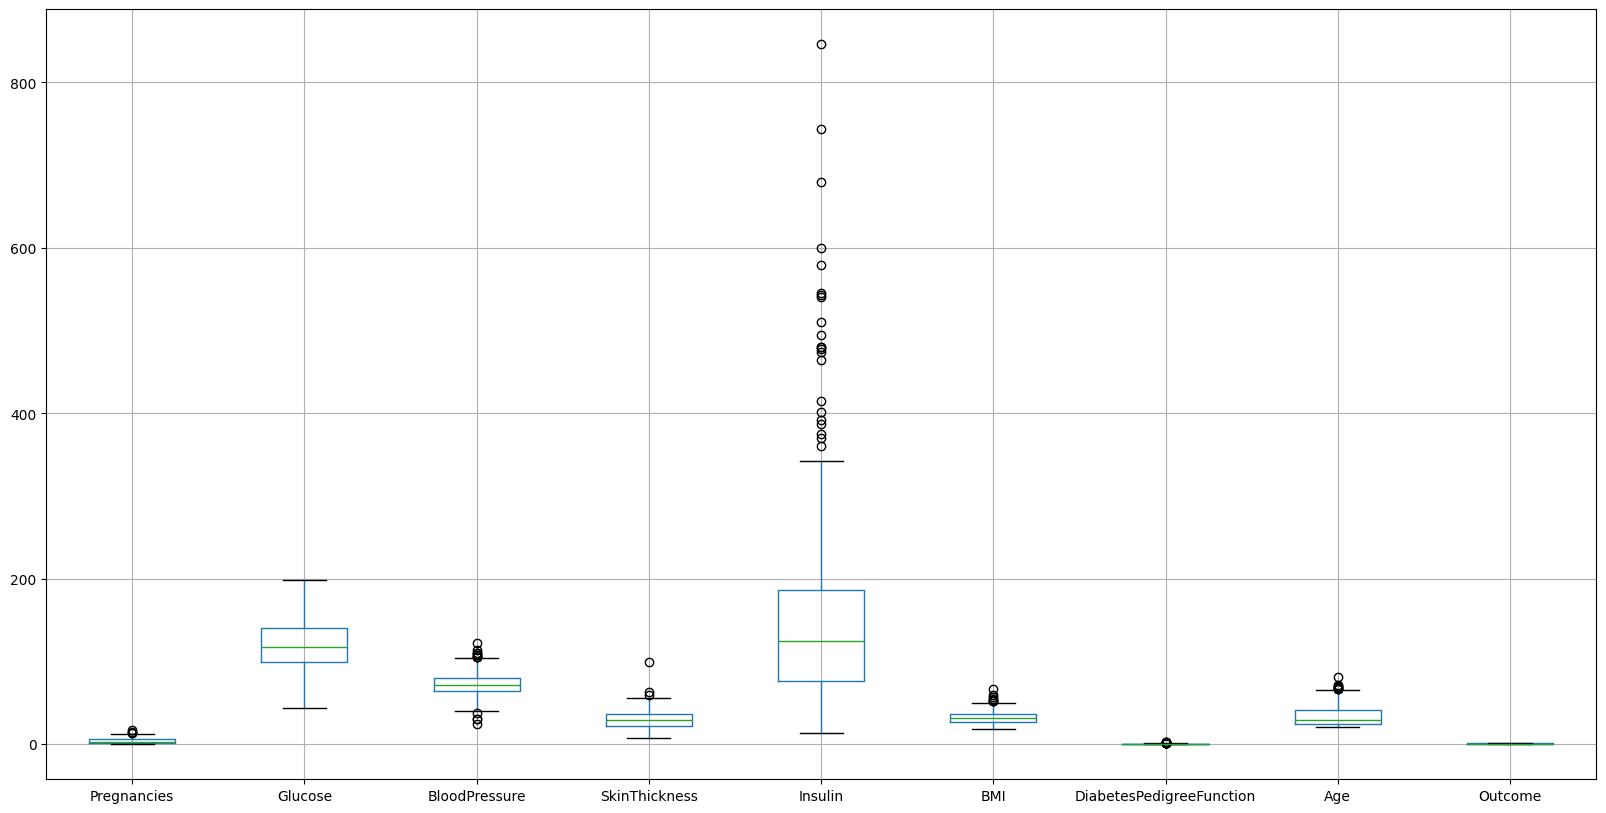

In [11]:
plt.figure(figsize=(20, 10))
df.boxplot()
plt.show()

In [12]:
# Calcular el IQR para cada columna
iqr = df.quantile(0.75) - df.quantile(0.25)

# Determinar los límites inferior y superior
lower_bound = df.quantile(0.25) - 1.5 * iqr
upper_bound = df.quantile(0.75) + 1.5 * iqr

# Identificar los outliers
outliers = ((df < lower_bound) | (df > upper_bound))

# Mostrar los outliers
# Calcular el porcentaje de outliers por columna
outliers_percentage = (outliers.sum() / df.notna().sum() * 100).round(2)


# Mostrar los outliers en la misma tabla
outliers_table = pd.DataFrame({
    'Outliers': outliers.sum(),
    '%Outliers': outliers_percentage
})
display(outliers_table)

,Outliers,%Outliers
Pregnancies,4,0.52
Glucose,0,0.00
BloodPressure,13,1.78
SkinThickness,3,0.56
Insulin,22,5.74
BMI,8,1.06
DiabetesPedigreeFunction,29,3.80
Age,9,1.18
Outcome,0,0.00


Como tenemos poco porcentaje de outlbajos en las variables conforme el modelo de cajas con bigotes, procederemos ademos eli estos outliers rlos  que ar la data yejore el proceso de imput posterior.acion

In [13]:
# Filtrar el dataframe para eliminar los outliers
df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


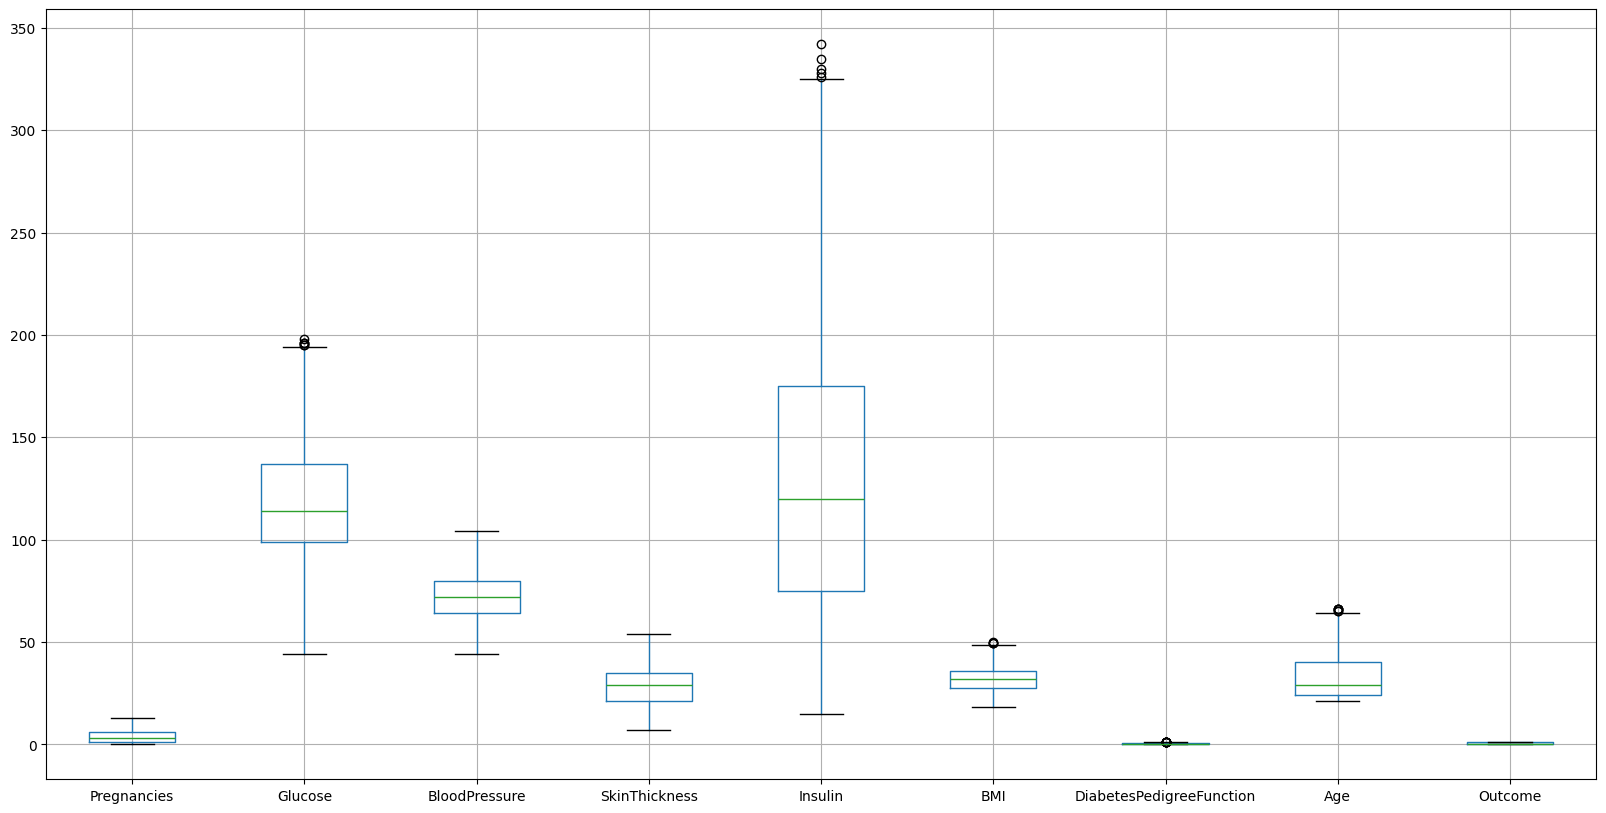

In [14]:
plt.figure(figsize=(20, 10))
df_filtered.boxplot()
plt.show()

Ya con la base sin outliers se nota ya uibucion de las variables mas estabcon s para el prazonales rocesiniciar o de imputacionconfirma .

## 3- Imputaciones de valores faltantes
----

In [15]:
df_filtered.isna().sum()

Pregnancies                   0
Glucose                      17
BloodPressure                35
SkinThickness               211
Insulin                     355
BMI                          13
DiabetesPedigreeFunction      4
Age                           6
Outcome                       0
dtype: int64

In [16]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

# Normalizar los datos usando RobustScaler
robust_scaler = RobustScaler()
df_scaled = pd.DataFrame(robust_scaler.fit_transform(df_filtered), columns=df_filtered.columns)

# Crear el imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)

# Realizar la imputación
df_imputed_scaled = pd.DataFrame(knn_imputer.fit_transform(df_scaled), columns=df_scaled.columns)

# Deshacer la normalización
df_imputed = pd.DataFrame(robust_scaler.inverse_transform(df_imputed_scaled), columns=df_filtered.columns)

# Verificar los cambios
print("Datos después de la imputación con KNN y normalización robusta:")
print(df_imputed.isna().sum())

Datos después de la imputación con KNN y normalización robusta:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


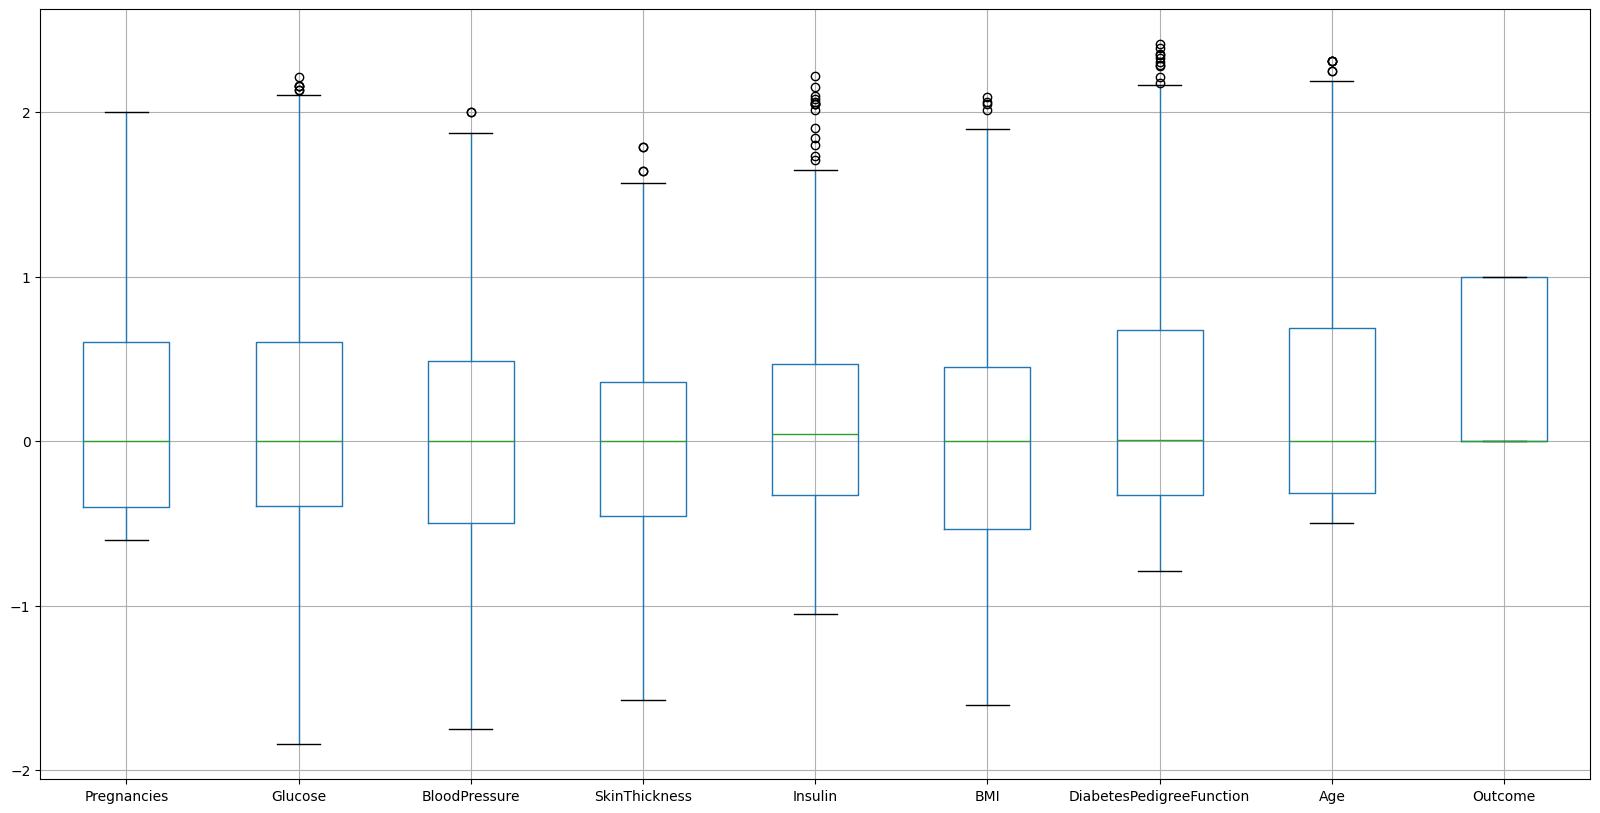

In [17]:


plt.figure(figsize=(20, 10))
df_imputed_scaled.boxplot()
plt.show()

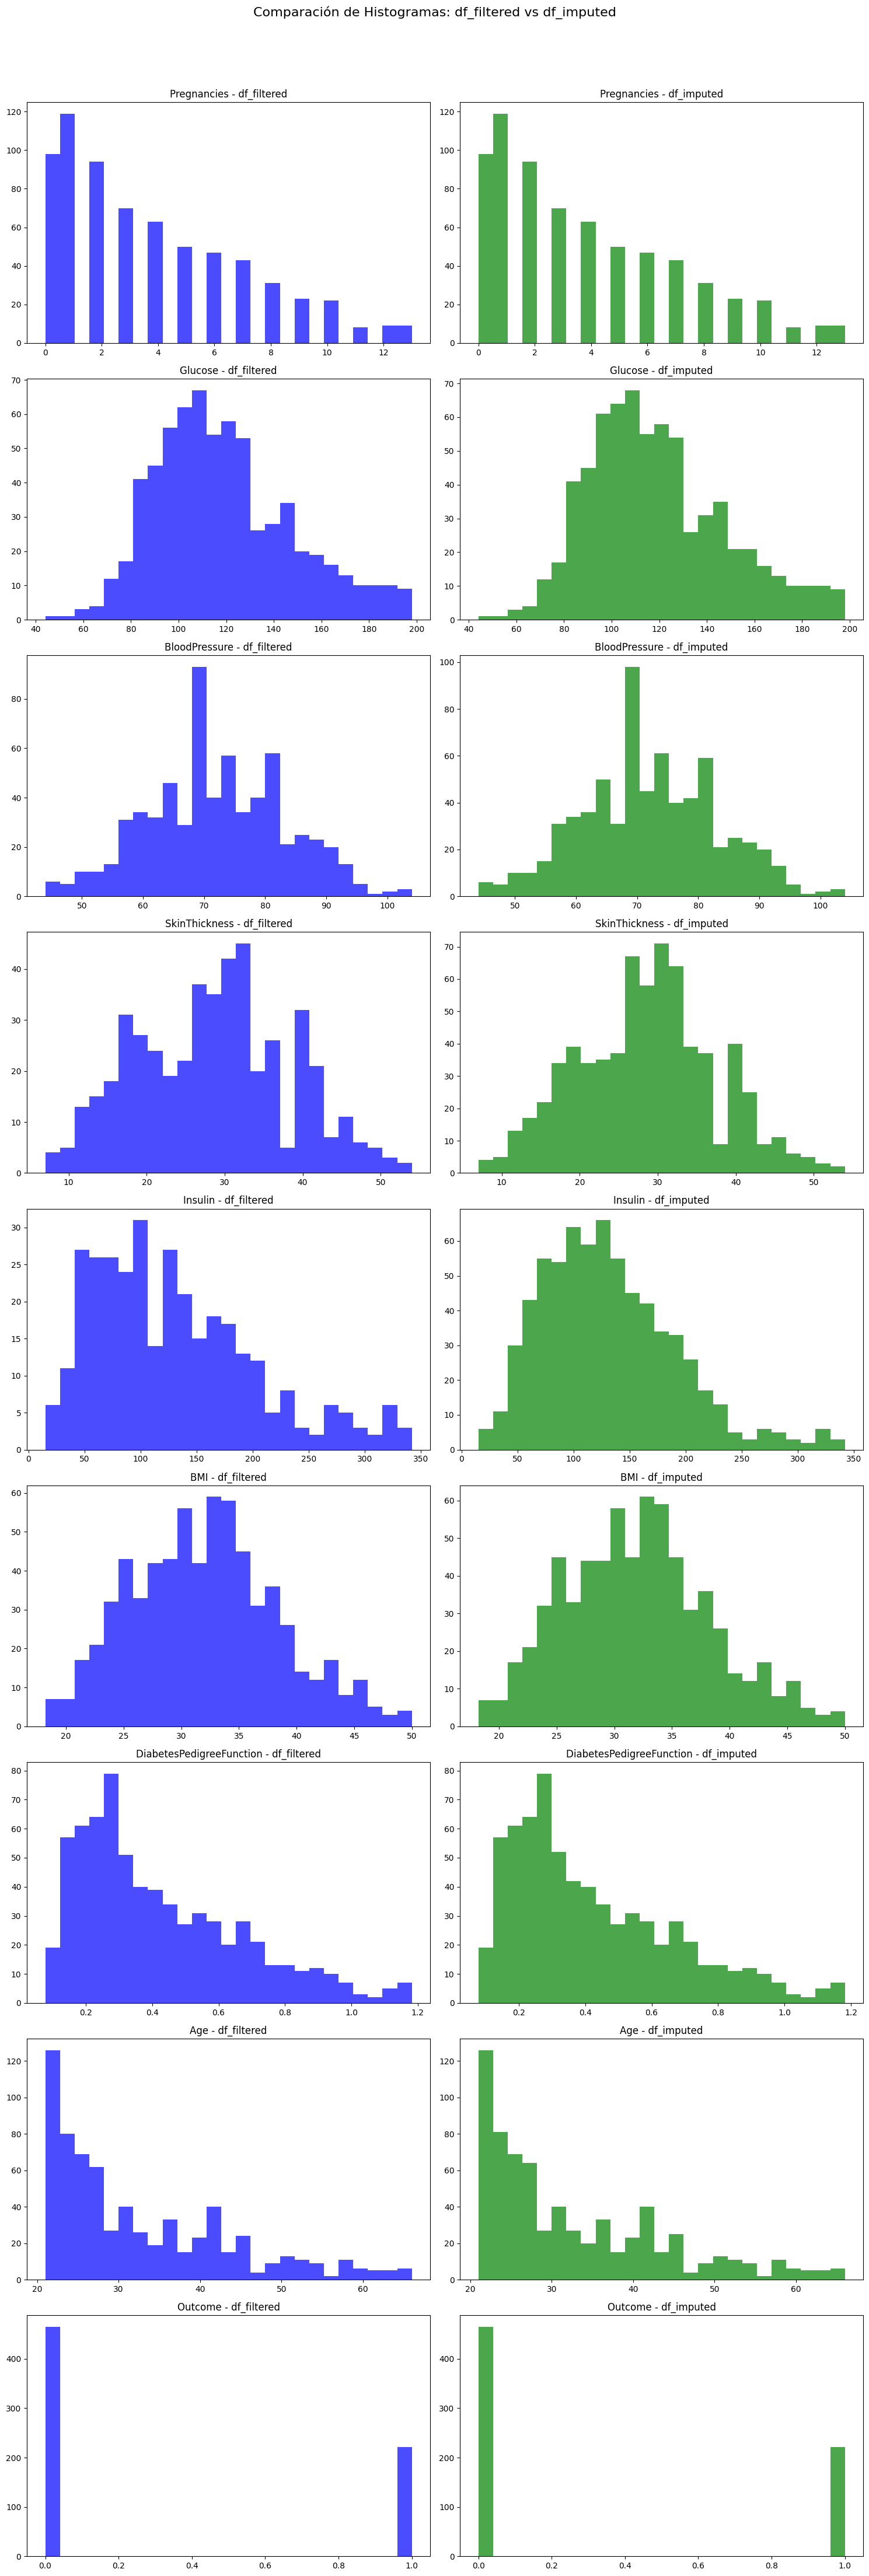

In [18]:
# Generar histogramas para cada variable en df_imputed
# Generar gráficos en parejas para cada variable en df_filtered y df_imputed
variables = df_filtered.columns

fig, axes = plt.subplots(len(variables), 2, figsize=(15, 5 * len(variables)))
fig.suptitle('Comparación de Histogramas: df_filtered vs df_imputed', fontsize=16)

for i, var in enumerate(variables):
    # Histograma para df_filtered
    axes[i, 0].hist(df_filtered[var].dropna(), bins=25, alpha=0.7, color='blue')
    axes[i, 0].set_title(f'{var} - df_filtered')
    
    # Histograma para df_imputed
    axes[i, 1].hist(df_imputed[var].dropna(), bins=25, alpha=0.7, color='green')
    axes[i, 1].set_title(f'{var} - df_imputed')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Se observa que la imputación de los datos faltantes no alteró las distribuciones originales.

## 4- Analisis desbalanceo e imputacion
------

### 4.1 Verificacion de desbalance

In [19]:
# Calcular la cantidad de cada valor en la columna 'Outcome'
outcome_counts = df_imputed['Outcome'].value_counts()

# Calcular el porcentaje de cada valor en la columna 'Outcome'
outcome_percentages = df_imputed['Outcome'].value_counts(normalize=True) * 100

# Crear un DataFrame con los resultados
outcome_summary = pd.DataFrame({
    'Cantidad': outcome_counts,
    'Porcentaje': outcome_percentages.round(2)
})

# Mostrar el DataFrame
print(outcome_summary)

         Cantidad  Porcentaje
Outcome                      
0.0           465       67.78
1.0           221       32.22


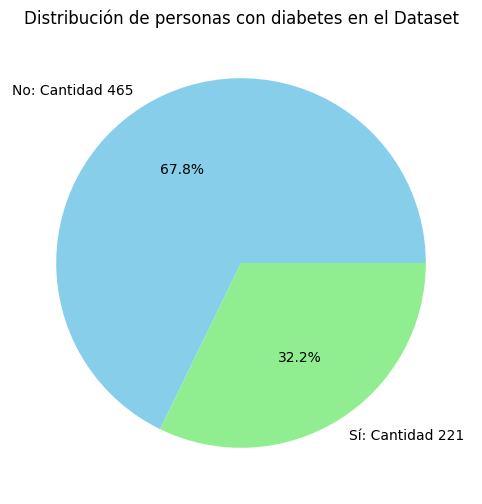

In [20]:
# Crear etiquetas con cantidades y porcentajes
labels = [f'{"Sí:" if outcome == 1 else "No:"} Cantidad {count}' for outcome, count, percentage in zip(outcome_counts.index, outcome_counts, outcome_percentages)]

# Graficar el gráfico de pastel
outcome_counts.plot(kind='pie', figsize=(10, 6), labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.title('Distribución de personas con diabetes en el Dataset')
plt.show()

Como se puede notar, tenemos una cantidad menor de personas con diabetes en el dataset: un 32.2% con diabetes versus un 67.8% sin diabetes. Esta desproporción puede llevar a que los modelos predictivos estén sesgados hacia la clase mayoritaria, resultando en un rendimiento subóptimo para la detección de diabetes. Para abordar este problema y mejorar la capacidad del modelo para identificar correctamente los casos de diabetes, se utilizará ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning). ADASYN genera nuevas muestras sintéticas de la clase minoritaria de manera adaptativa, enfocándose en las regiones del espacio de características donde la clase minoritaria es más difícil de aprender, lo que ayuda a crear un conjunto de datos más equilibrado y mejora la precisión del modelo en la predicción de la clase minoritaria.

### 4.2 Creacion de valores sinteticos

In [21]:
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Separar las características y la variable objetivo
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Normalizar las características usando RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Crear el sobremuestreador ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Aplicar ADASYN para sobremuestrear la clase minoritaria
X_resampled, y_resampled = adasyn.fit_resample(X_scaled, y)

# Desnormalizar las características
X_resampled = scaler.inverse_transform(X_resampled)

# Combinar las características y la variable objetivo en un nuevo DataFrame
df_adasyn = pd.DataFrame(X_resampled, columns=X.columns)
df_adasyn['Outcome'] = y_resampled
# Verificar la distribución de la variable objetivo después del sobremuestreo
print("Distribución de 'Outcome' después de ADASYN:")
print(df_adasyn['Outcome'].value_counts())

# Calcular el porcentaje de cada valor en la columna 'Outcome'
outcome_percentages_adasyn = df_adasyn['Outcome'].value_counts(normalize=True) * 100
print("\nPorcentaje de 'Outcome' después de ADASYN:")
print(outcome_percentages_adasyn.round(2))

Distribución de 'Outcome' después de ADASYN:
Outcome
1.0    514
0.0    465
Name: count, dtype: int64

Porcentaje de 'Outcome' después de ADASYN:
Outcome
1.0    52.5
0.0    47.5
Name: proportion, dtype: float64


ya con 47% que 52% 

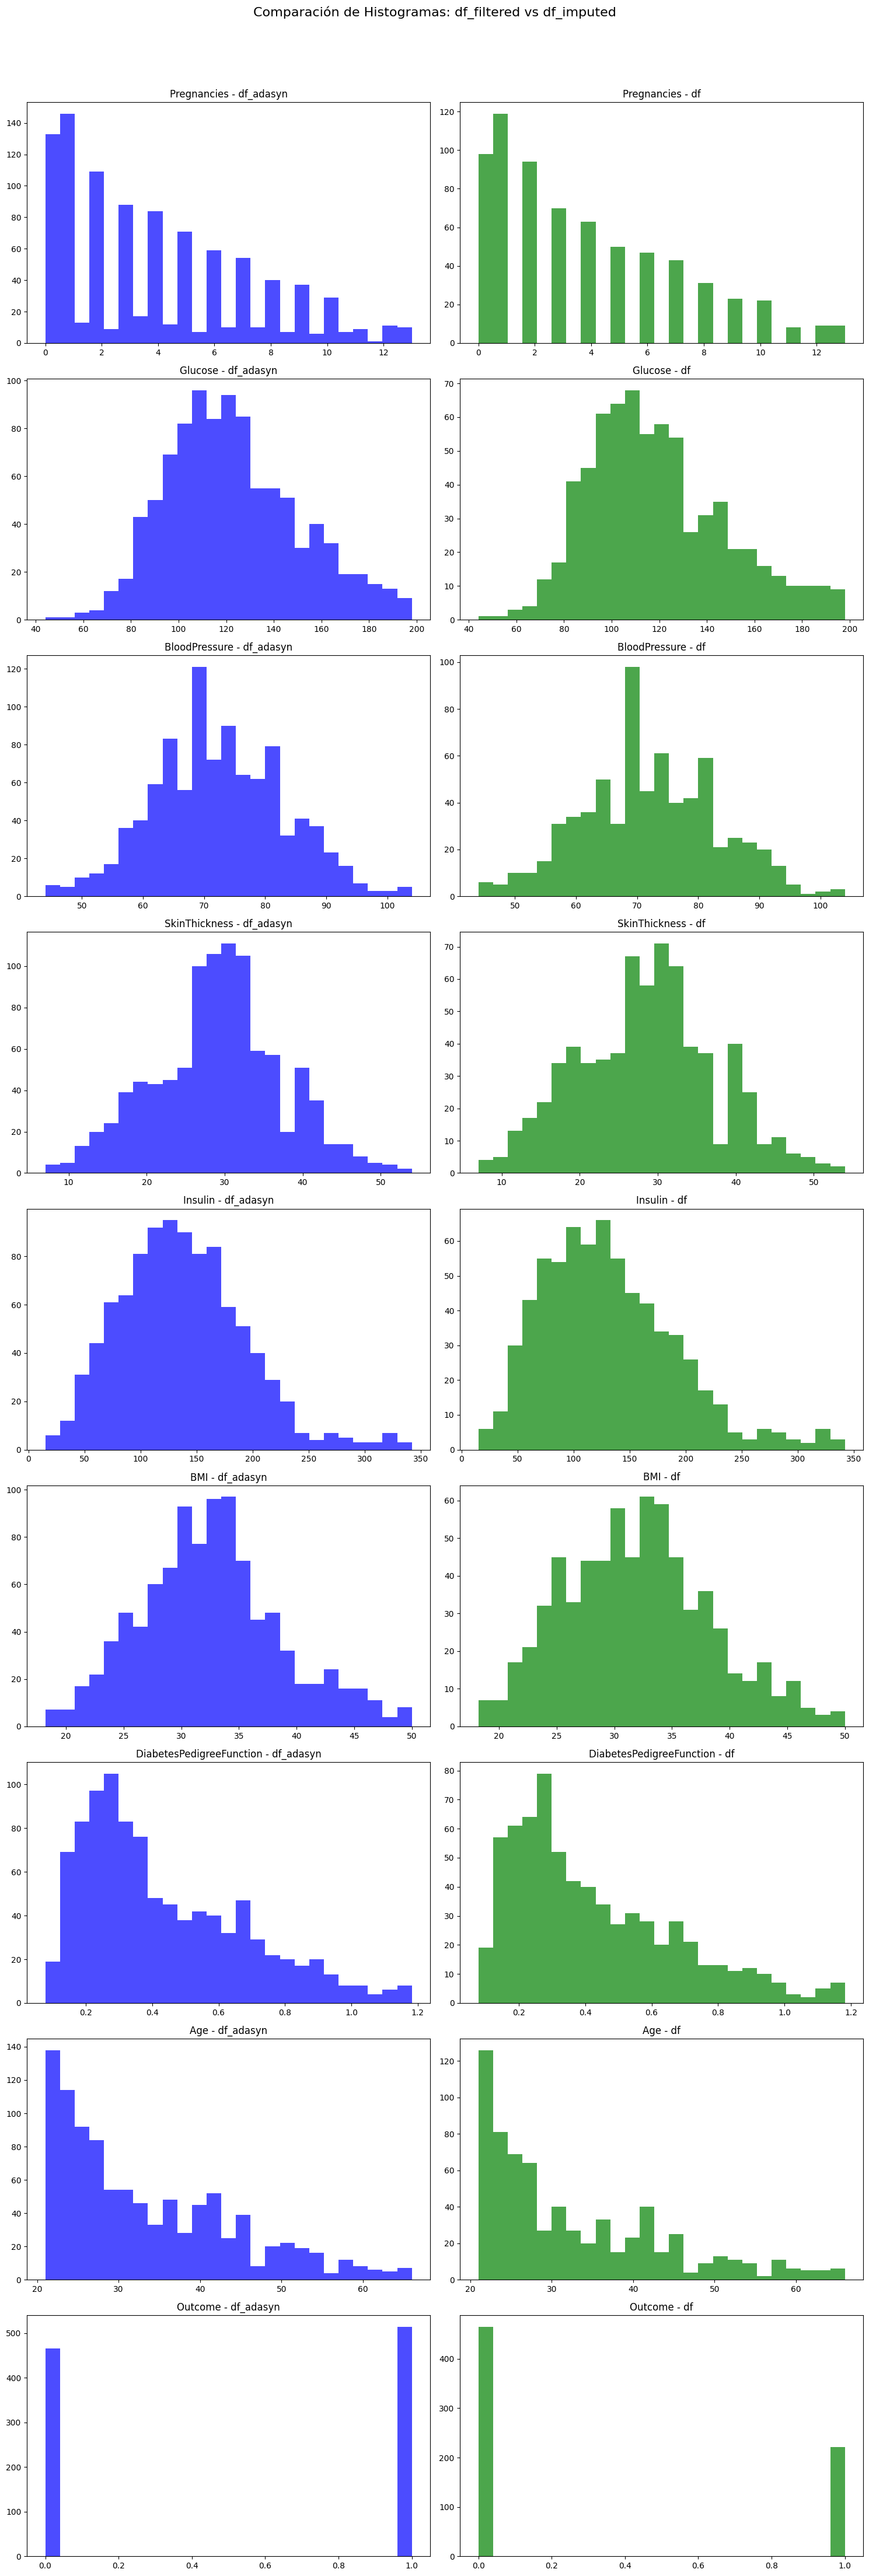

In [22]:
#
# Generar gráficos en parejas para cada variable en df_filtered y df_imputed
variables = df_filtered.columns

fig, axes = plt.subplots(len(variables), 2, figsize=(15, 5 * len(variables)))
fig.suptitle('Comparación de Histogramas: df_filtered vs df_imputed', fontsize=16)

for i, var in enumerate(variables):
    # Histograma para df_filtered
    axes[i, 0].hist(df_adasyn[var].dropna(), bins=25, alpha=0.7, color='blue')
    axes[i, 0].set_title(f'{var} - df_adasyn')
    
    # Histograma para df_imputed
    axes[i, 1].hist(df_imputed[var].dropna(), bins=25, alpha=0.7, color='green')
    axes[i, 1].set_title(f'{var} - df')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Después de aplicar ADASYN para generar muestras sintéticas para la clase minoritaria (Outcome = 1). Las distribuciones de las variables no se vieron significativamente afectadas, lo que asegura que la imputación de datos no perjudicó la integridad del conjunto de datos original y nos ayudo para tener una muestra de datos mas balanceadas para posibles futuros modelos

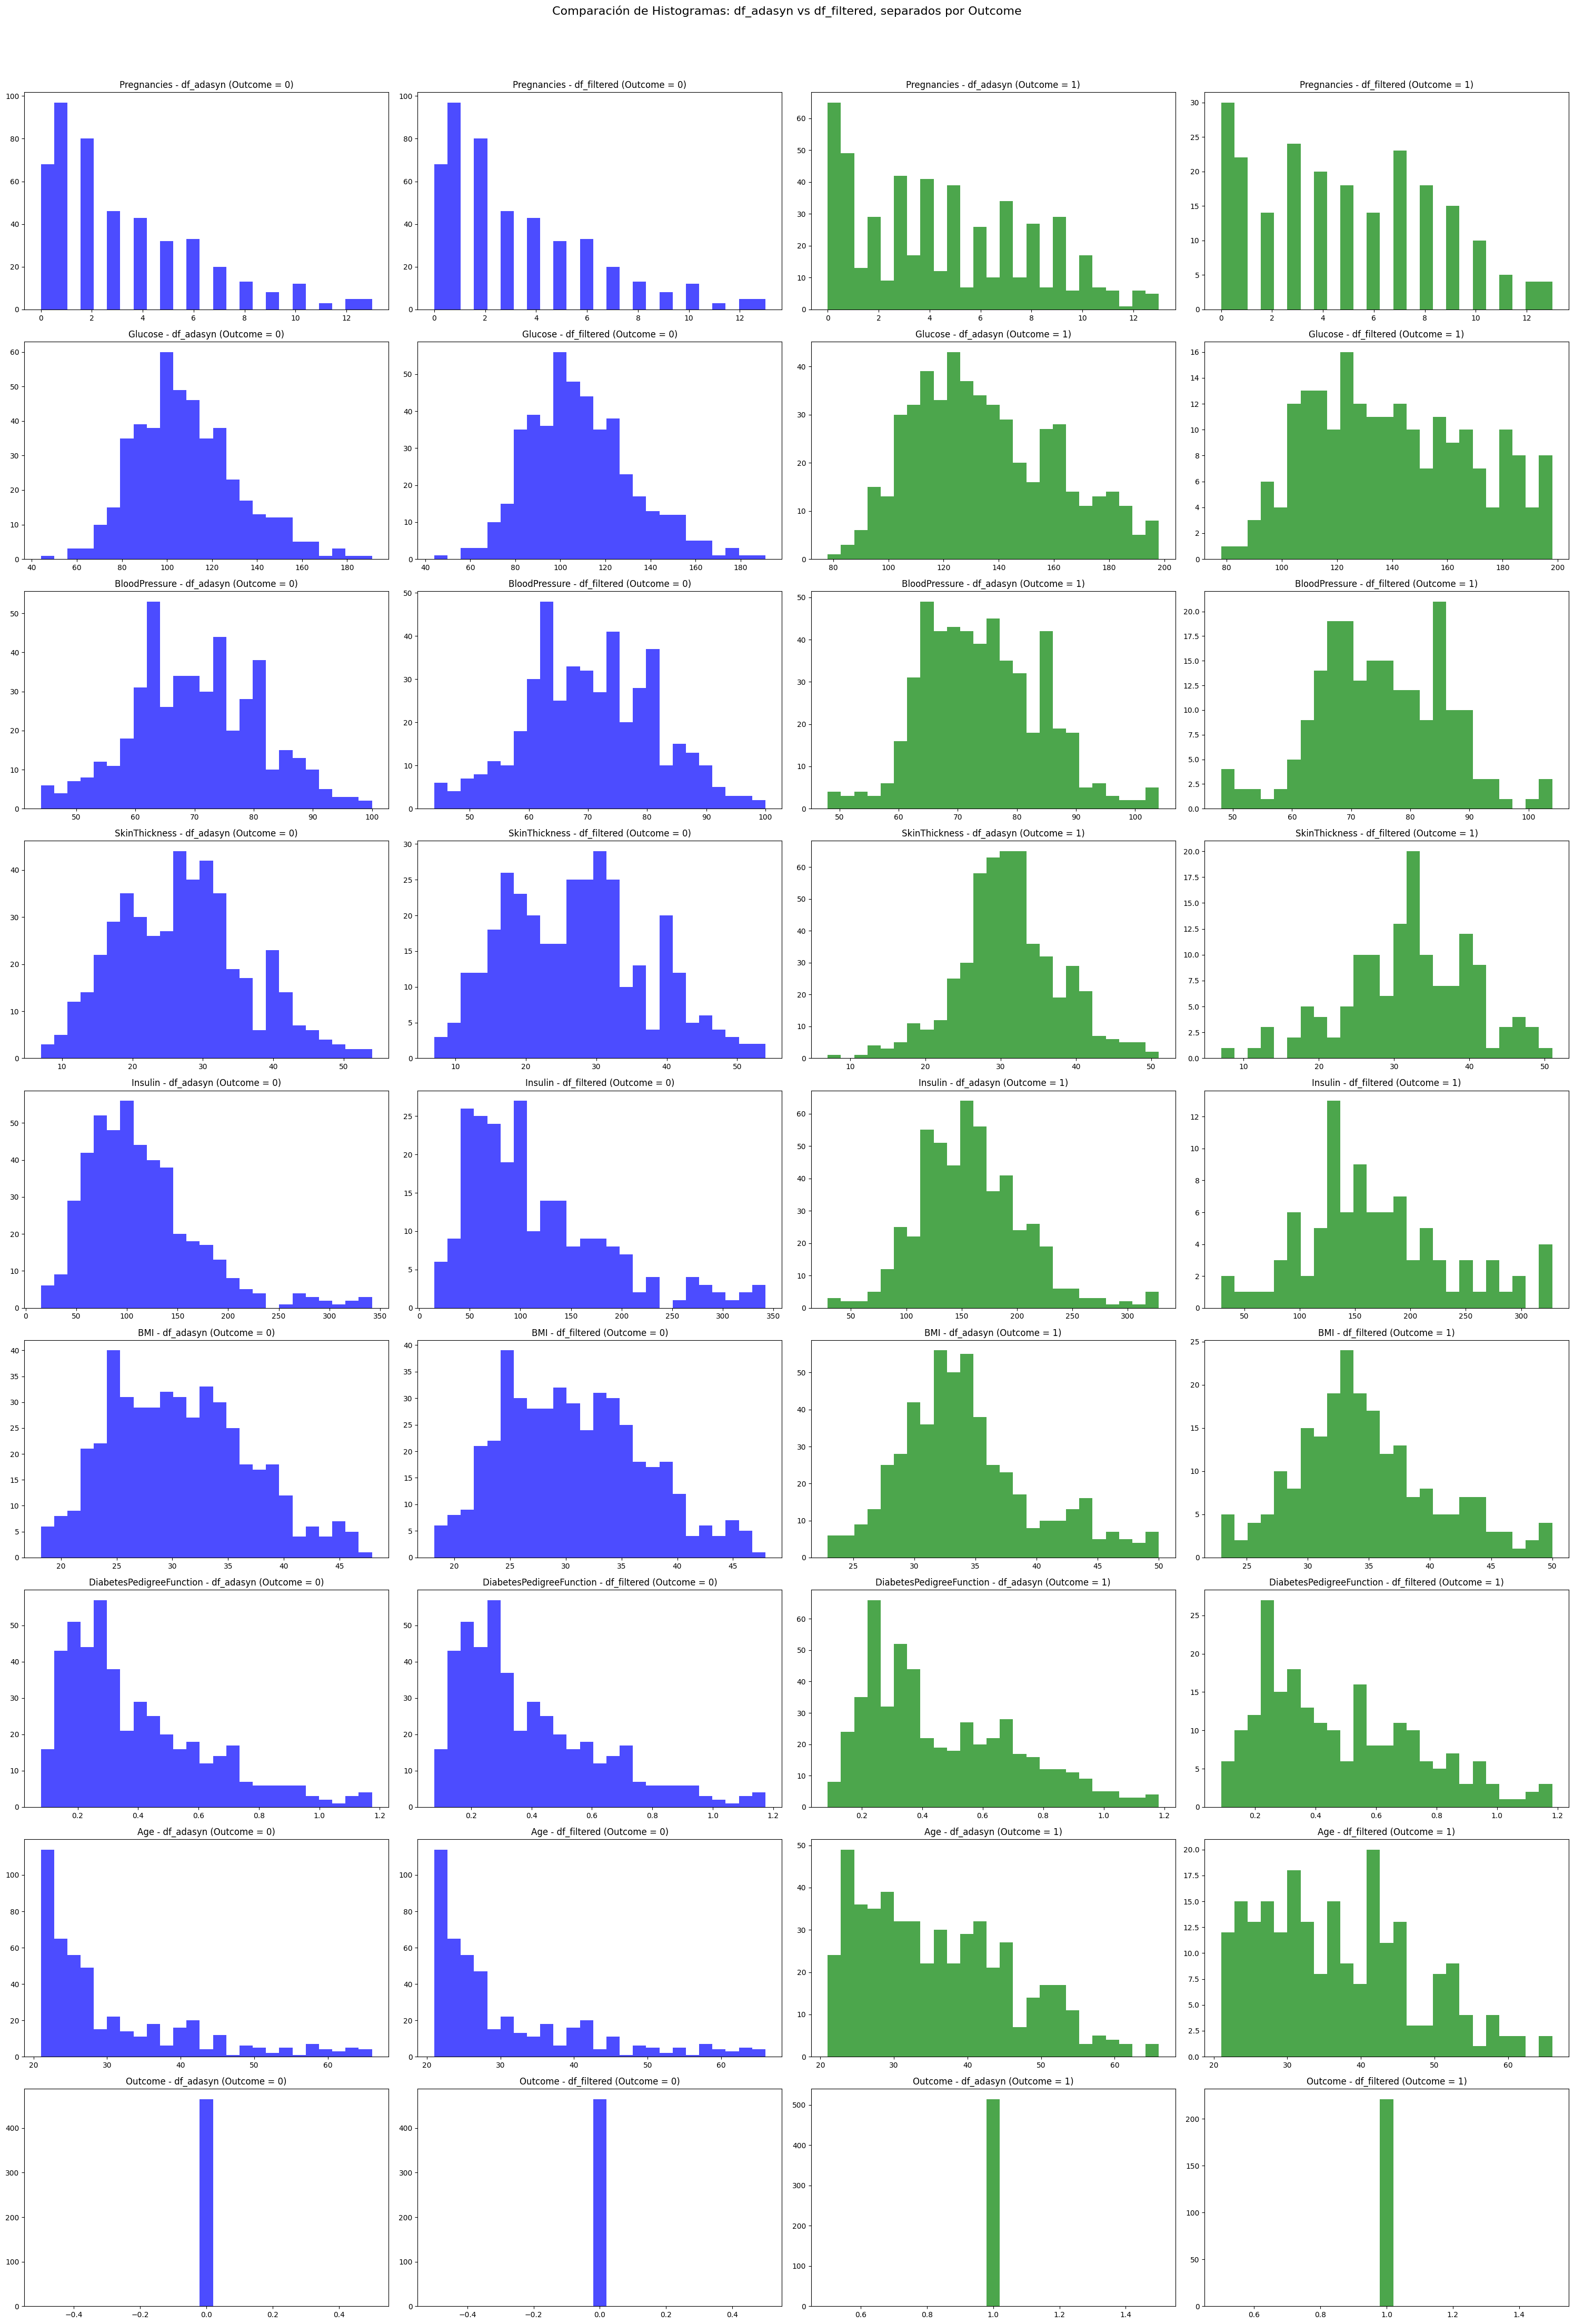

In [23]:
# Generar gráficos en parejas para cada variable en df_adasyn y df_filtered, separados por Outcome
variables = df_filtered.columns

fig, axes = plt.subplots(len(variables), 4, figsize=(30, 5 * len(variables)))
fig.suptitle('Comparación de Histogramas: df_adasyn vs df_filtered, separados por Outcome', fontsize=16)

for i, var in enumerate(variables):
    # Histograma para df_adasyn con Outcome = 0
    axes[i, 0].hist(df_adasyn[df_adasyn['Outcome'] == 0][var].dropna(), bins=25, alpha=0.7, color='blue')
    axes[i, 0].set_title(f'{var} - df_adasyn (Outcome = 0)')
    
    # Histograma para df_adasyn con Outcome = 1
    axes[i, 2].hist(df_adasyn[df_adasyn['Outcome'] == 1][var].dropna(), bins=25, alpha=0.7, color='green')
    axes[i, 2].set_title(f'{var} - df_adasyn (Outcome = 1)')
    
    # Histograma para df_imputed con Outcome = 0
    axes[i, 1].hist(df_filtered[df_filtered['Outcome'] == 0][var].dropna(), bins=25, alpha=0.7, color='blue')
    axes[i, 1].set_title(f'{var} - df_filtered (Outcome = 0)')
    
    # Histograma para df_imputed con Outcome = 1
    axes[i, 3].hist(df_filtered[df_filtered['Outcome'] == 1][var].dropna(), bins=25, alpha=0.7, color='green')
    axes[i, 3].set_title(f'{var} - df_filtered (Outcome = 1)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Se confirma que las curvas de cada variable se mantienen razonablemente similares para cada categorías (con diabetes y sin diabetes) comparando la data con los outliners filtrados y la data con los valores imputados y balanceados.